# Modeling with linear regression in python project

## Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

## Load in data 

In [2]:
heights = pd.read_csv("/Users/victoria/Downloads/heights.csv")

In [6]:
heights.head()

,AM_Height,PM_Height
0,1728.75,1720.25
1,1538.25,1528.50
2,1462.25,1452.50
3,1782.50,1776.50
4,1671.00,1667.00


## Test assumptions 

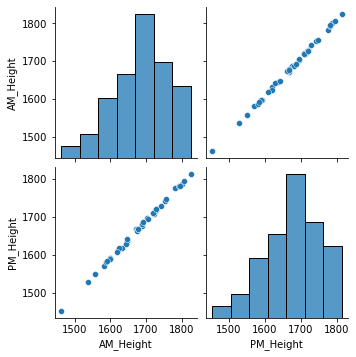

In [7]:
sns.pairplot(heights)

/Users/victoria/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AM_Height', ylabel='Density'>

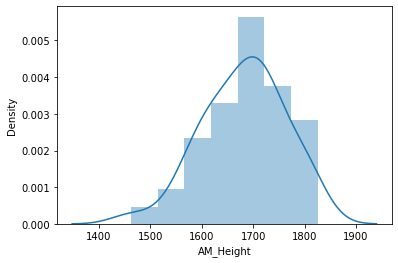

In [8]:
sns.distplot(heights['AM_Height'])

/Users/victoria/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM_Height', ylabel='Density'>

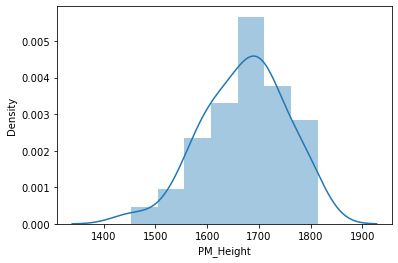

In [9]:
sns.distplot(heights['PM_Height'])

### The data is normally distributed and it has a linear relationship

## Testing for Homoscedasticity

In [10]:
x = heights['AM_Height']
y = heights['PM_Height']

In [11]:
model = sm.OLS(y,x).fit()

In [12]:
pred_val = model.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

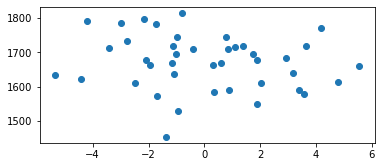

In [13]:
fig, ax = plt.subplots(figsize= (6,2.5))
_ = ax.scatter(residual, pred_val)

In [14]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(17.29010600968471, nan, 29.169436213839077, 3.2763133813758523e-06)

### The p value is less than .05 so that means that it is significant and also it means that the data is heteroscedastic

In [15]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

In [16]:
transformed, _ = boxcox(heights['AM_Height'])

(array([1., 1., 4., 6., 4., 9., 7., 3., 3., 3.]),
 array([5.21052681e+11, 5.92351778e+11, 6.63650875e+11, 7.34949971e+11,
        8.06249068e+11, 8.77548165e+11, 9.48847262e+11, 1.02014636e+12,
        1.09144546e+12, 1.16274455e+12, 1.23404365e+12]),
 <BarContainer object of 10 artists>)

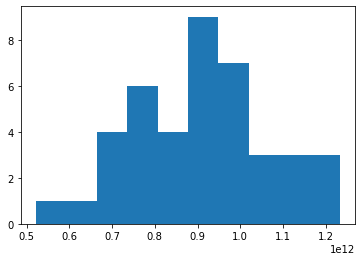

In [17]:
plt.hist(transformed)

In [18]:
x= transformed 
model1 = sm.OLS(x,y).fit()
model1.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fb13224ab80>>

In [19]:
pred_val = model1.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual= true_val - pred_val

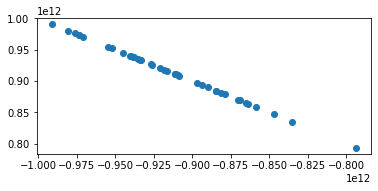

In [20]:
fig, ax= plt.subplots(figsize= (6,2.5))
_ = ax.scatter(residual, pred_val)

In [22]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(40.91517126549056, nan, 19293.071623476997, 2.5930264241103363e-55)

In [23]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

## Screening for outliers 

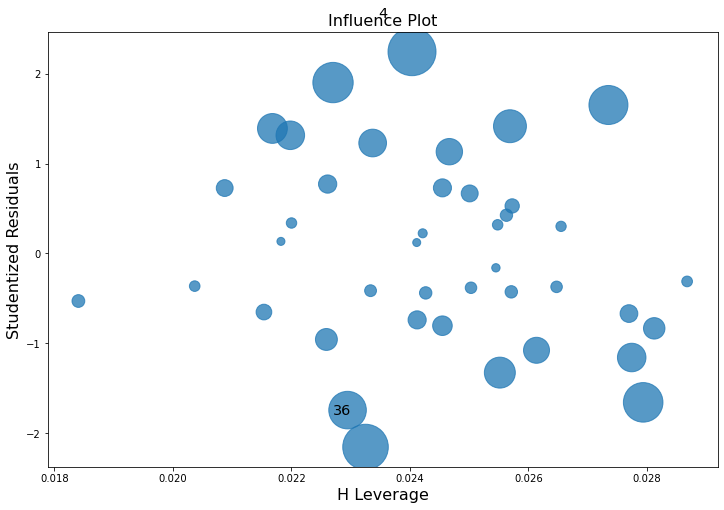

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
fig= sm.graphics.influence_plot(model, alpha= .05, ax= ax, criterion= "cooks")


In [26]:
infl= model.get_influence()
print(infl.summary_frame())

    dfb_AM_Height   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        0.085810  0.007499        0.532882  0.025727         0.086594   
1       -0.052524  0.002820       -0.368264  0.020370        -0.053103   
2       -0.072577  0.005364       -0.534832  0.018407        -0.073238   
3        0.276961  0.073531        1.617035  0.027352         0.271167   
4        0.352303  0.112733        2.139438  0.024037         0.335757   
5       -0.096874  0.009521       -0.657675  0.021538        -0.097576   
6        0.018976  0.000369        0.122229  0.024116         0.019215   
7       -0.214747  0.045255       -1.314577  0.025519        -0.212733   
8       -0.064154  0.004203       -0.419385  0.023338        -0.064829   
9       -0.113058  0.012961       -0.674508  0.027698        -0.113845   
10      -0.053609  0.002940       -0.315564  0.028680        -0.054224   
11      -0.281081  0.075697       -1.622878  0.027938        -0.275131   
12      -0.176694  0.031094       -1.0

In [28]:
heights.drop(heights.index[36], inplace=True)

In [29]:
x= heights['AM_Height']
y= heights['PM_Height']

In [36]:
modelNoO = sm.OLS(y,x).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.665e+07
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                   5.17e-114
Time:                        15:15:09   Log-Likelihood:                         -97.263
No. Observations:                  41   AIC:                                      196.5
Df Residuals:                      40   BIC:                                      198.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9943      0.000   4079.964      0.000       0.994       0.995
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.817
Skew:                           0.133   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
modelNoO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.774e+07
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                   5.93e-112
Time:                        15:20:57   Log-Likelihood:                         -93.134
No. Observations:                  40   AIC:                                      188.3
Df Residuals:                      39   BIC:                                      190.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9944      0.000   4212.277      0.000       0.994       0.995
==============================================================================
Omnibus:                        1.607   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.295
Skew:                           0.247   Prob(JB):                        0.523
Kurtosis:                       2.270   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""